In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist

In [ ]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

In [ ]:
train_features.shape

(60000, 28, 28)

# Preprocessing

In [ ]:
np.min(train_features), np.max(train_features)

(0, 255)

In [ ]:
# becuase all data set between 0 and 1
train_features = train_features / 255.0
test_features = test_features / 255.0

# Model definition

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

In [ ]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.sparse_categorical_crossentropy
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

In [ ]:
 model.build(input_shape = (None, 28, 28))
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stop_val_loss = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 60, restore_best_weights = True)
early_stop_val_accuracy = keras.callbacks.EarlyStopping(monitor = 'val_accuracy' , patience = 60, restore_best_weights = True)

In [ ]:
hist = model.fit(train_features, train_labels,
                 epochs = 200, batch_size = 256,
                 validation_data = (test_features, test_labels),
                 callbacks = [early_stop_val_loss, early_stop_val_accuracy]
                 )

Epoch 1/200
235/235 [==============================] - 2s 5ms/step - loss: 0.4105 - accuracy: 0.8852 - val_loss: 0.1839 - val_accuracy: 0.9451
Epoch 2/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1553 - accuracy: 0.9542 - val_loss: 0.1390 - val_accuracy: 0.9575
Epoch 3/200
235/235 [==============================] - 1s 4ms/step - loss: 0.1084 - accuracy: 0.9676 - val_loss: 0.1039 - val_accuracy: 0.9682
Epoch 4/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9750 - val_loss: 0.0975 - val_accuracy: 0.9687
Epoch 5/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0674 - accuracy: 0.9799 - val_loss: 0.0885 - val_accuracy: 0.9707
Epoch 6/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0536 - accuracy: 0.9843 - val_loss: 0.0829 - val_accuracy: 0.9729
Epoch 7/200
235/235 [==============================] - 1s 5ms/step - loss: 0.0448 - accuracy: 0.9869 - val_loss: 0.0809 - val_accuracy: 0.9743

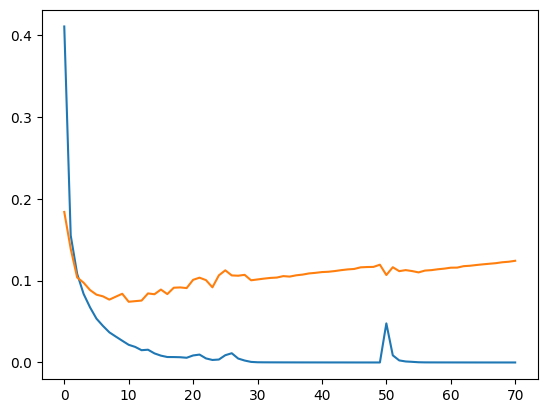

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

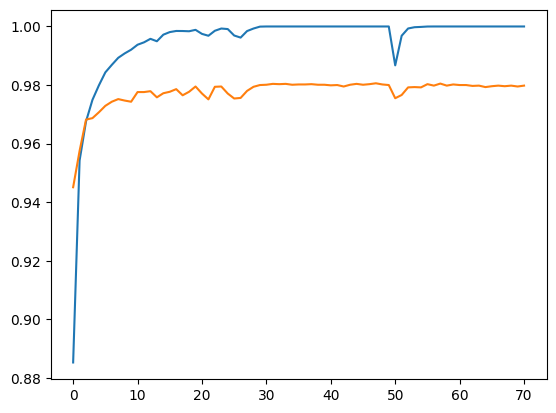

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9776


[0.07420655339956284, 0.9775999784469604]

# Predict

In [ ]:
idx = 110
img = test_features[idx]
print(test_labels[idx])

8


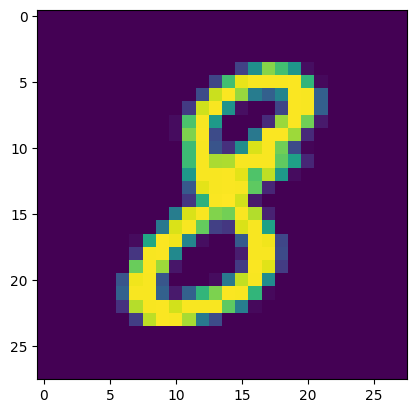

In [ ]:
plt.imshow(img)

In [ ]:
model.predict(np.reshape(img, (-1, 784)))

1/1 [==============================] - 0s 18ms/step


array([[3.9089278e-09, 2.4684841e-08, 1.7122219e-06, 8.0419246e-05,
        1.6390734e-11, 2.5867269e-08, 1.2266065e-09, 9.7053691e-13,
        9.9991786e-01, 1.8942918e-08]], dtype=float32)